### [Scikit-Learn Classifier Comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [34]:
import torch

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sklearn.metrics as measure

DATA_PATH = "../../data/embeddings/x_y_trn_val.pt"

classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma=2, C=1),
    "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5,
                                            n_estimators=10,
                                            max_features=1),
    "Neural Net": MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
}

In [35]:
# Import embeddings and prepare x_trn, x_val, y_trn, y_val.
data = torch.load(DATA_PATH)

x_trn, y_trn = data["x_trn"], data["y_trn"]
x_val, y_val = data["x_val"], data["y_val"]

In [36]:
def classify(x_trn, y_trn, x_val, y_val, name, clf):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(x_trn, y_trn)
    pred_val = clf.predict(x_val)
    accuracy = measure.accuracy_score(y_val, pred_val)
    print(f"{name}: {accuracy:.3f}")

    disp = measure.ConfusionMatrixDisplay.from_predictions(
            y_val,
            pred_val,
            display_labels=["Dance (0.18)", "Couple Romance (0.32)",
                            "Heartbreak Romance (0.27)", "Memes (0.09)",
                            "Pranks (0.14)"],
            normalize="true",
            xticks_rotation=45
            )

    plt.show()


Nearest Neighbors: 0.407


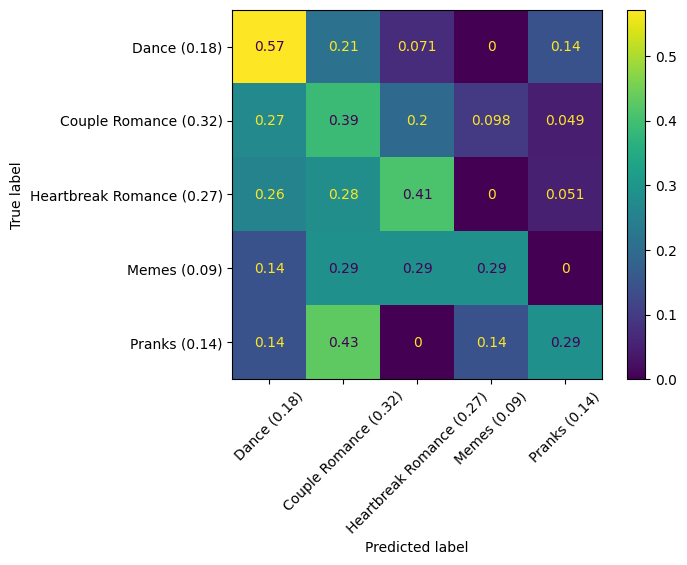

Linear SVM: 0.565


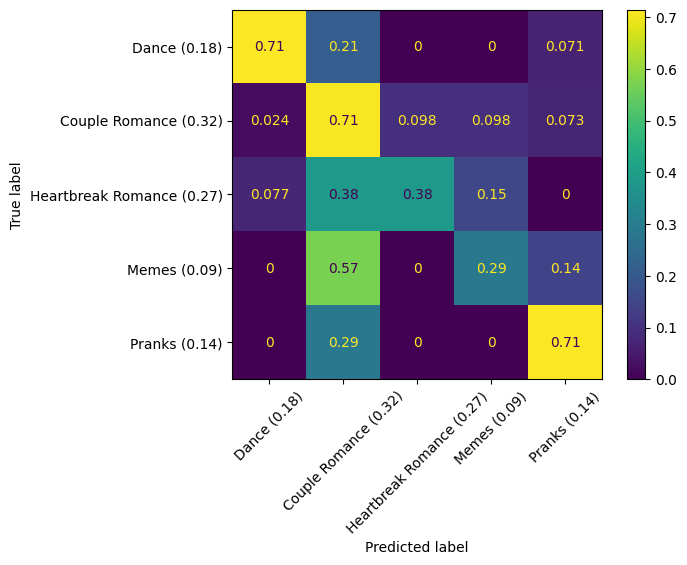

RBF SVM: 0.380


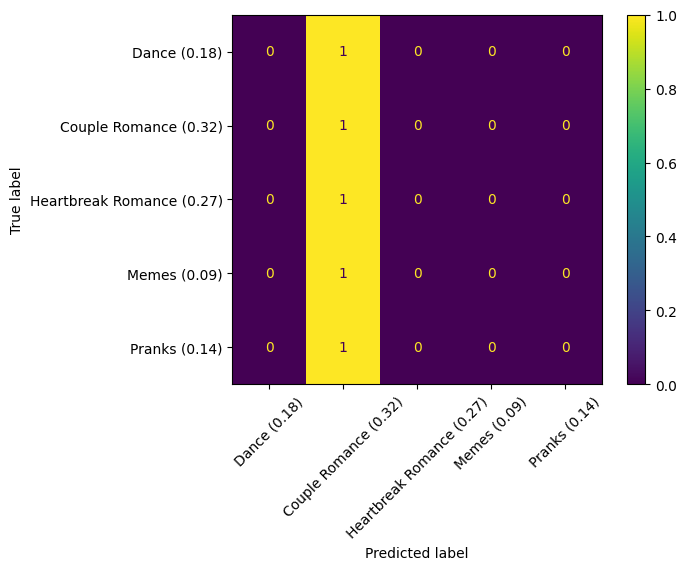

Gaussian Process: 0.602


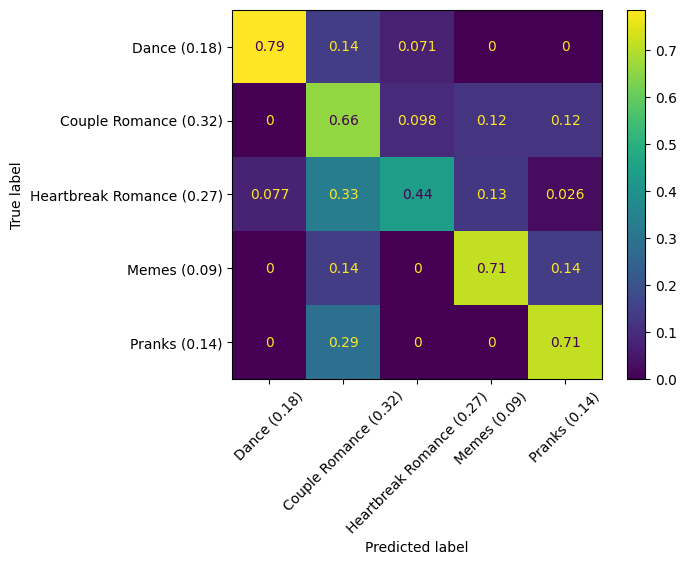

Decision Tree: 0.500


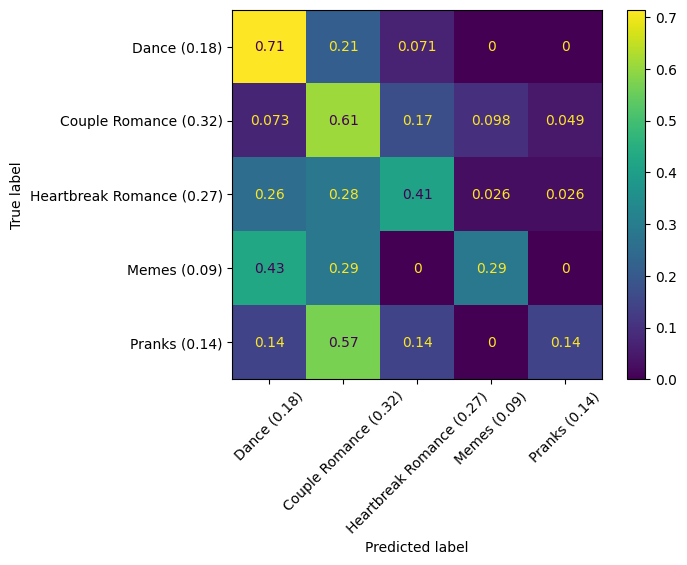

Random Forest: 0.519


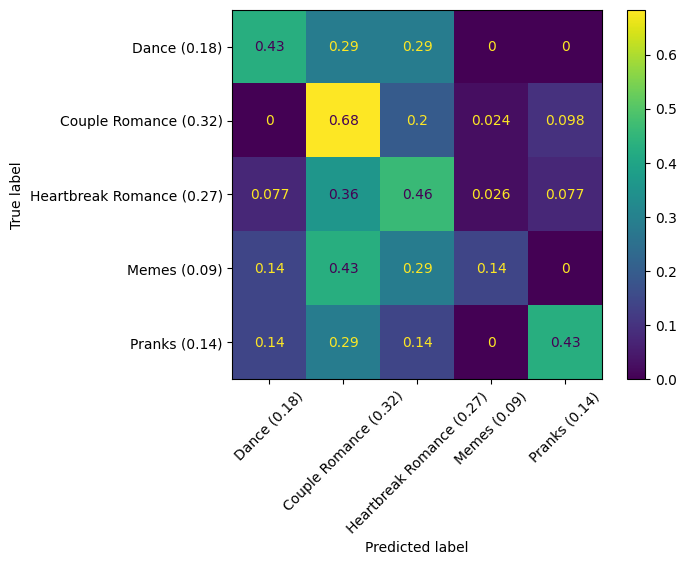

Neural Net: 0.583


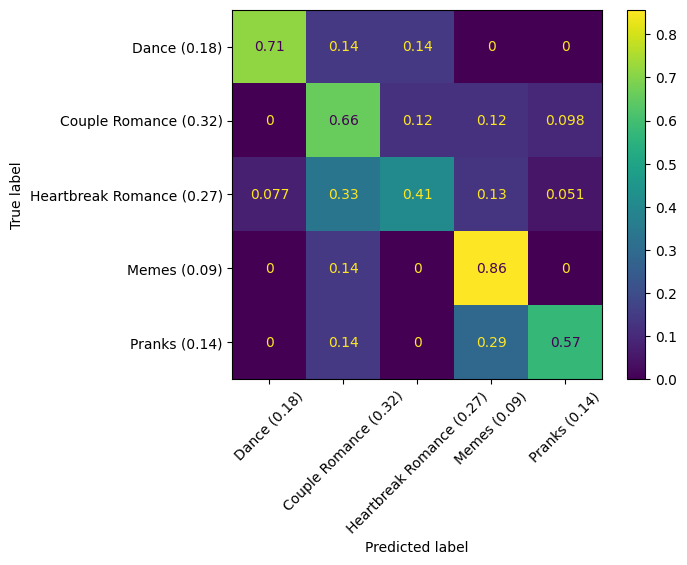

AdaBoost: 0.454


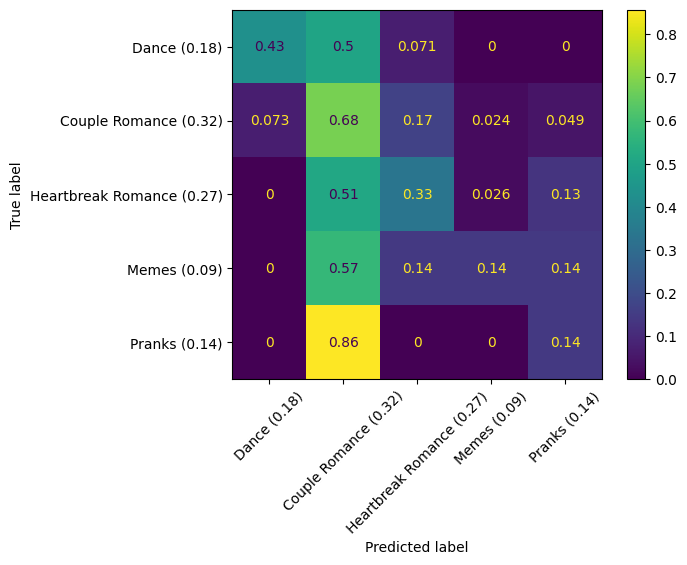

Naive Bayes: 0.417


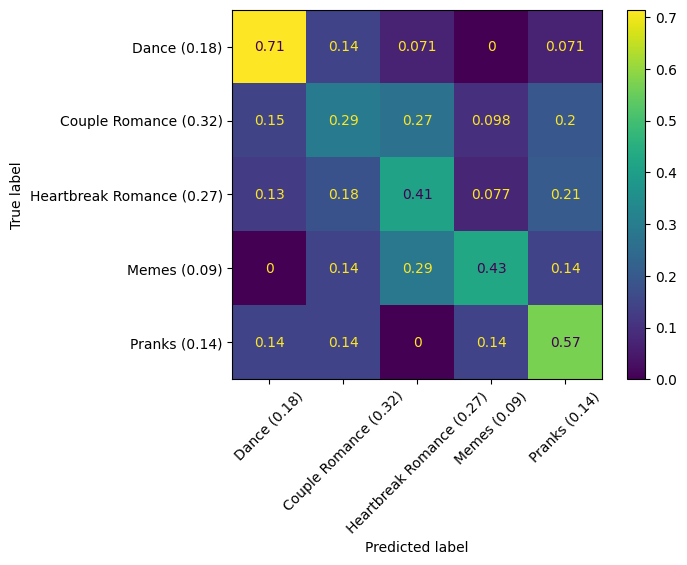

/home/devvrit/anaconda3/envs/mmvision/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA: 0.389


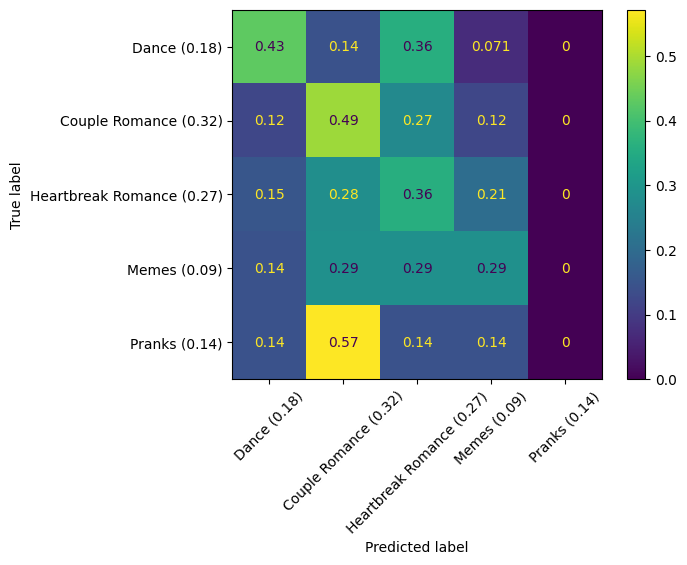

In [37]:
"""Iterate over classifiers."""
for name, clf in classifiers.items():
    classify(x_trn, y_trn, x_val, y_val, name, clf)